<a href="https://colab.research.google.com/github/Rahafhosari/DataScience2024-2025/blob/master/preparing_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wide Data
Name : Rahaf Hosari

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
pd.set_option("display.max_info_rows", 800)
pd.set_option('display.max_info_columns',800)
from sklearn import set_config
set_config(transform_output='pandas')

In [5]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

## Helper Functions

In [6]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")

    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(),
                       fontweight=xtick_fontweight)

    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

## Load Data

In [7]:
path = '/content/drive/MyDrive/AXSOSACADEMY/07-TimeSeriesAnalysis/Preparing Time Series from Large Form Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
df = pd.read_csv(path)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,...,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,257207.0,260310.0,263204.0,266206.0,269324.0,272045.0,274610.0,277439.0,280925.0,284072.0,287118.0,289892.0,293193.0,296389.0,299302.0,302120.0,304740.0,307580.0,309783.0,312162.0,314868.0,318074.0,321528.0,323675.0,323070.0,321943.0,NaN,324148.0,326758.0,330210.0,333453.0,336666.0,338838.0,341000.0,343228.0,346501.0,350643.0,355426.0,360063.0,365359.0,369589.0,373404.0,375975.0,378964.0,382001.0,385034.0,388643.0,392144.0,395659.0,398641.0,402494.0,406543.0,411545.0,415806.0,421448.0,427436.0,434280.0,440351.0,445083.0,449783.0,455706.0,462730.0,469737.0,474641.0,481469.0,488465.0,496490.0,504240.0,510505.0,518321.0,524506.0,531180.0,534690.0,537450.0,541227.0,545399.0,548731.0,551922.0,553075.0,551202.0,545438.0,542420.0,541607.0,542651.0,546786.0,548487.0,551304.0,547678.0,546023.0,544485.0,...,521827.0,523994.0,526960.0,530259.0,532636.0,535174.0,537597.0,539714.0,541519.0,542949.0,546086.0,549158.0,553907.0,557588.0,561230.0,564172.0,567015.0,570778.0,574357.0,577233.0,579539.0,581544.0,585030.0,588447.0,591804.0,594949.0,598075.0,601320.0,604287.0,607787.0,611658.0,615747.0,618357.0,621066.0,623072.0,626662.0,630102.0,634813.0,638447.0,642131.0,646474.0,650521.0,654063.0,656700.0,661012.0,665672.0,669989.0,673514.0,676434.0,678984.0,681140.0,683546.0,685588.0,688553.0,691226.0,693208.0,694425.0,695720.0,695824.0,696173.0,695186.0,695010.0,692926.0,690189.0,687693.0,686304.0,686650.0,688073.0,689697.0,690055.0,690520.0,689921.0,690785.0,691384.0,693097.0,694261.0,696260.0,698929.0,701899.0,703956.0,705003.0,706066.0,707633.0,710706.0,714507.0,719155.0,724138.0,730055.0,735069.0,738773.0,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0


In [8]:
df.shape

(22467, 281)

Filter the 4 largest cities into a new dataframe.<br/>
Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
Therefore the 4 largest cities would have rank values of [0,1,2,3]


In [9]:
df['SizeRank'].value_counts().sort_index(ascending=True)

,count
SizeRank,
0,1
1,1
2,1
3,1
4,1
...,...
28389,1
28409,1
28413,1


In [10]:
#Filter DF to cities with Size Rank 0 1 2 3
df_largest_cities = df[df['SizeRank'] <= 3]
df_largest_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,...,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,257207.0,260310.0,263204.0,266206.0,269324.0,272045.0,274610.0,277439.0,280925.0,284072.0,287118.0,289892.0,293193.0,296389.0,299302.0,302120.0,304740.0,307580.0,309783.0,312162.0,314868.0,318074.0,321528.0,323675.0,323070.0,321943.0,NaN,324148.0,326758.0,330210.0,333453.0,336666.0,338838.0,341000.0,343228.0,346501.0,350643.0,355426.0,360063.0,365359.0,369589.0,373404.0,375975.0,378964.0,382001.0,385034.0,388643.0,392144.0,395659.0,398641.0,402494.0,406543.0,411545.0,415806.0,421448.0,427436.0,434280.0,440351.0,445083.0,449783.0,455706.0,462730.0,469737.0,474641.0,481469.0,488465.0,496490.0,504240.0,510505.0,518321.0,524506.0,531180.0,534690.0,537450.0,541227.0,545399.0,548731.0,551922.0,553075.0,551202.0,545438.0,542420.0,541607.0,542651.0,546786.0,548487.0,551304.0,547678.0,546023.0,544485.0,...,521827.0,523994.0,526960.0,530259.0,532636.0,535174.0,537597.0,539714.0,541519.0,542949.0,546086.0,549158.0,553907.0,557588.0,561230.0,564172.0,567015.0,570778.0,574357.0,577233.0,579539.0,581544.0,585030.0,588447.0,591804.0,594949.0,598075.0,601320.0,604287.0,607787.0,611658.0,615747.0,618357.0,621066.0,623072.0,626662.0,630102.0,634813.0,638447.0,642131.0,646474.0,650521.0,654063.0,656700.0,661012.0,665672.0,669989.0,673514.0,676434.0,678984.0,681140.0,683546.0,685588.0,688553.0,691226.0,693208.0,694425.0,695720.0,695824.0,696173.0,695186.0,695010.0,692926.0,690189.0,687693.0,686304.0,686650.0,688073.0,689697.0,690055.0,690520.0,689921.0,690785.0,691384.0,693097.0,694261.0,696260.0,698929.0,701899.0,703956.0,705003.0,706066.0,707633.0,710706.0,714507.0,719155.0,724138.0,730055.0,735069.0,738773.0,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0


> Largest Citites are NewYork, Los Angeles, Houston, Chicago

Melt the data to long-form and prepare it for time series analysis.<br/>
- Convert the melted dates into datetime datatype.
- Make the datetime column the index.

In [11]:
df_largest_cities.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [12]:
# Melt the data into long-form
melted_df = pd.melt(df_largest_cities,
    id_vars=['RegionID', 'RegionName','RegionType','SizeRank','StateName', 'State','Metro','CountyName'],
                                var_name='Date',
                                value_name='HouseValue')
melted_df

,RegionID,RegionName,RegionType,SizeRank,StateName,State,Metro,CountyName,Date,HouseValue
0,6181,New York,city,0,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,Los Angeles,city,1,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,Houston,city,2,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,Chicago,city,3,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,New York,city,0,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,Chicago,city,3,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,New York,city,0,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,Los Angeles,city,1,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,Houston,city,2,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [13]:
# Convert the 'Date' column into datetime format
melted_df['Date'] = pd.to_datetime(melted_df['Date'], errors='coerce')

#Note: using errors='coerce', it will replace incompatible values will NaT (Not a Time).

In [14]:
melted_df['Date'].isna().sum()

np.int64(0)

#After we put an index we check the null values.

In [15]:
melted_df.isna().sum()

,0
RegionID,0
RegionName,0
RegionType,0
SizeRank,0
StateName,0
State,0
Metro,0
CountyName,0
Date,0
HouseValue,5


> House Values has 5 Missing Values

In [16]:
melted_df = melted_df.set_index("Date")

In [17]:
# Interpolate missing house values using linear interpolation
melted_df['HouseValue'] = melted_df['HouseValue'].interpolate(method='linear')

In [18]:
melted_df.isna().sum()

,0
RegionID,0
RegionName,0
RegionType,0
SizeRank,0
StateName,0
State,0
Metro,0
CountyName,0
HouseValue,0


In [19]:
melted_df.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

Resample the dataframe as monthly frequency, grouped by City.

In [20]:
# Resample the data by month, grouped by city (RegionName)
resampled_df = melted_df.groupby(['RegionName']).resample('M').sum()

<ipython-input-20-92e6768af9a0>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = melted_df.groupby(['RegionName']).resample('M').sum()


In [21]:
resampled_df.index

MultiIndex([( 'Chicago', '2000-01-31'),
            ( 'Chicago', '2000-02-29'),
            ( 'Chicago', '2000-03-31'),
            ( 'Chicago', '2000-04-30'),
            ( 'Chicago', '2000-05-31'),
            ( 'Chicago', '2000-06-30'),
            ( 'Chicago', '2000-07-31'),
            ( 'Chicago', '2000-08-31'),
            ( 'Chicago', '2000-09-30'),
            ( 'Chicago', '2000-10-31'),
            ...
            ('New York', '2021-12-31'),
            ('New York', '2022-01-31'),
            ('New York', '2022-02-28'),
            ('New York', '2022-03-31'),
            ('New York', '2022-04-30'),
            ('New York', '2022-05-31'),
            ('New York', '2022-06-30'),
            ('New York', '2022-07-31'),
            ('New York', '2022-08-31'),
            ('New York', '2022-09-30')],
           names=['RegionName', 'Date'], length=1092)

In [22]:
resampled_df.head()

RegionID RegionName RegionType  SizeRank StateName  \
RegionName Date                                                             
Chicago    2000-01-31     17426    Chicago       city         3        IL   
           2000-02-29     17426    Chicago       city         3        IL   
           2000-03-31     17426    Chicago       city         3        IL   
           2000-04-30     17426    Chicago       city         3        IL   
           2000-05-31     17426    Chicago       city         3        IL   

                      State                               Metro   CountyName  \
RegionName Date                                                                
Chicago    2000-01-31    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   
           2000-02-29    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   
           2000-03-31    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   
           2000-04-30    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   
           2000-05-31    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   

                       HouseValue  
RegionName Date                    
Chicago    2000-01-31    166139.0  
           2000-02-29    166536.0  
           2000-03-31    167368.0  
           2000-04-30    168826.0  
           2000-05-31    170499.0

# Visualization

Plot the home values for all 4 cities. (Hint: use unstack)
Make sure to add a title and axis labels.
Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
Hint: use the FuncFormatter from matplotlib.

In [23]:
# Unstack the data to separate the cities for plotting
city_values = resampled_df['HouseValue'].unstack(level='RegionName')
city_values.head()

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0


Text(0, 0.5, 'Home Value (in thousands)')

<Figure size 1200x600 with 0 Axes>

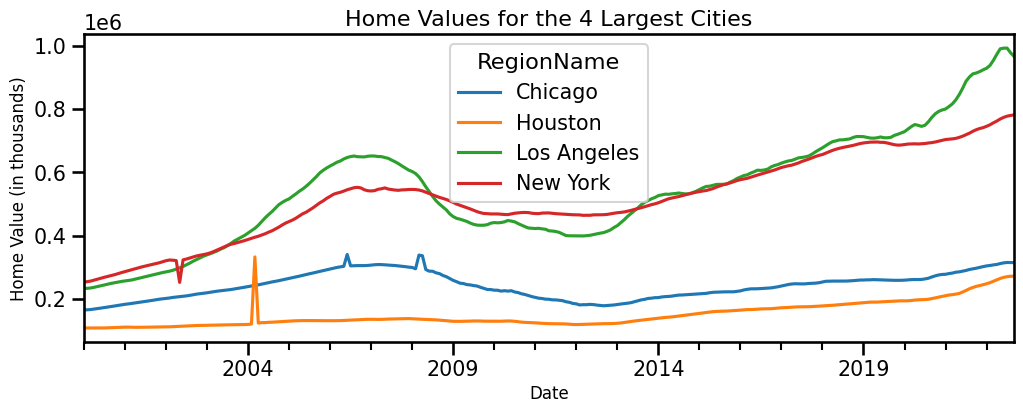

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Plot the home values for all 4 cities
plt.figure(figsize=(12, 6))
city_values.plot()

# Add title and axis labels
plt.title('Home Values for the 4 Largest Cities', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Home Value (in thousands)', fontsize=12)


<Figure size 1200x600 with 0 Axes>

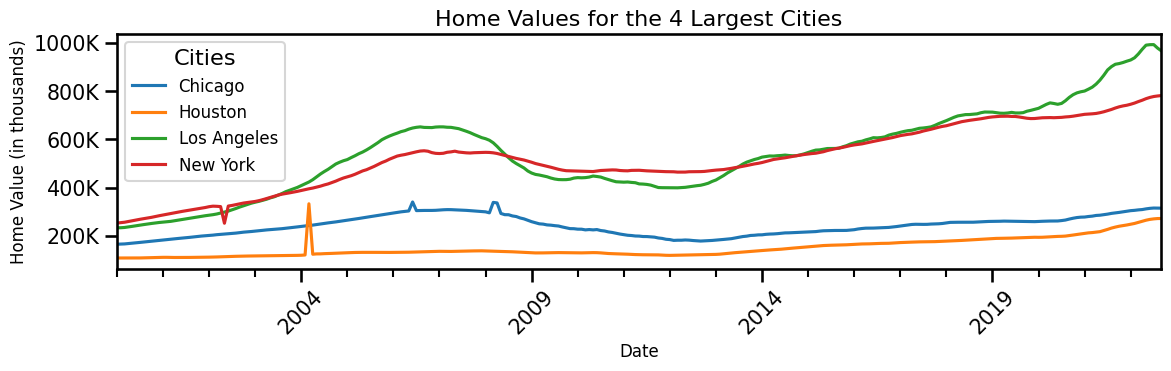

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Plot the home values for all 4 cities
plt.figure(figsize=(12, 6))
city_values.plot()

# Add title and axis labels
plt.title('Home Values for the 4 Largest Cities', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Home Value (in thousands)', fontsize=12)

# Format the y-axis to display values in thousands (K)
formatter = FuncFormatter(lambda x, pos: f'{int(x/1000)}K')
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot with proper labels and formatting
plt.legend(title='Cities', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.


In [26]:
# Step 1: Extract data for December 2008
december_2008 = city_values.loc['2008-12-31']

# Step 2: Find the city with the highest home value at the end of 2008
highest_value_city = december_2008.idxmax()
highest_value = december_2008.max()

# Step 3: Find the city with the lowest home value at the end of 2008
lowest_value_city = december_2008.idxmin()
lowest_value = december_2008.min()

# Display the results
highest_value_city, highest_value, lowest_value_city, lowest_value


('New York', 510309.0, 'Houston', 131283.0)

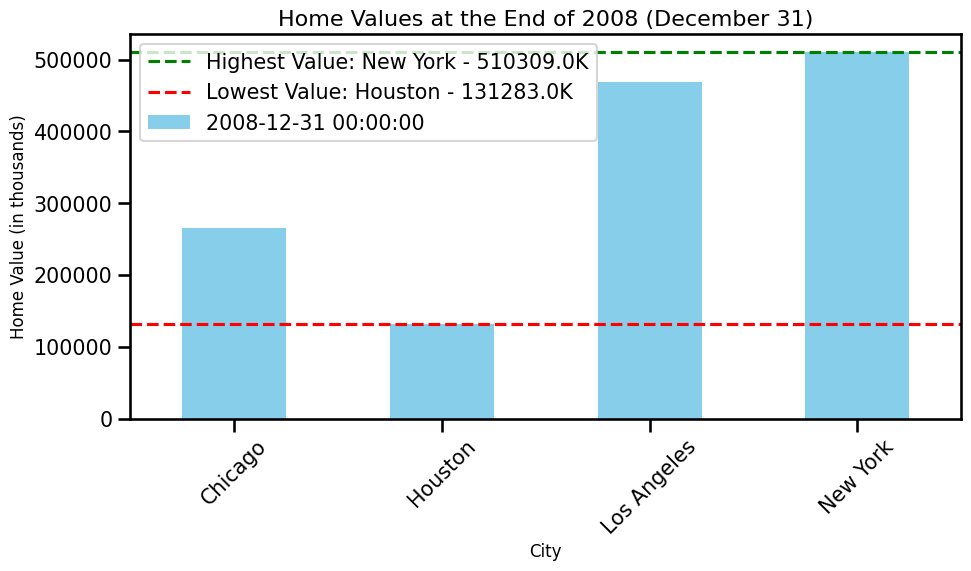

In [27]:
# Plot home values for all cities in December 2008
plt.figure(figsize=(10, 6))
december_2008.plot(kind='bar', color='skyblue')

# Highlight the highest and lowest values
highest_value_city = december_2008.idxmax()
highest_value = december_2008.max()
lowest_value_city = december_2008.idxmin()
lowest_value = december_2008.min()

plt.axhline(y=highest_value, color='green', linestyle='--', label=f'Highest Value: {highest_value_city} - {highest_value}K')
plt.axhline(y=lowest_value, color='red', linestyle='--', label=f'Lowest Value: {lowest_value_city} - {lowest_value}K')

# Add titles and labels
plt.title('Home Values at the End of 2008 (December 31)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Home Value (in thousands)', fontsize=12)

# Add legend and format the plot
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2) How much did the home values change from November 2008 to December 2008 (in dollars)?
Hint: you can use .diff() to calculate the change in values

In [28]:
# Extract data for November 2008 and December 2008
november_2008 = city_values.loc['2008-11-30']
december_2008 = city_values.loc['2008-12-31']

In [29]:
# Step 2: Calculate the difference in home values (December - November)
change_nov_december = december_2008 - november_2008

# Display the results
change_nov_december

,0
RegionName,
Chicago,-5753.0
Houston,-964.0
Los Angeles,-12611.0
New York,-4458.0


In [33]:
diff = city_values.loc['2008-11-30':'2008-12-31']
diff

diff.diff()

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-30,NaN,NaN,NaN,NaN
2008-12-31,-5753.0,-964.0,-12611.0,-4458.0


In [ ]:
# Calculate the change in home values from November to December 2008
change_nov_december = december_2008 - november_2008

# Plot the change in home values
plt.figure(figsize=(10, 6))
change_nov_december.plot(kind='bar', color='orange')

# Add titles and labels
plt.title('Change in Home Values from November 2008 to December 2008', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Change in Home Value (in thousands)', fontsize=12)

# Format the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()